In [1]:
import json

In [2]:
with open('INT_LINK_DATA.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
len(data)

1646

In [4]:
type(data)

list

In [5]:
node_ids = []
for datum in data:
    node_ids.append(datum['node_id'])

In [6]:
print(node_ids)
print(list(range(1,len(data)+1)))
print(node_ids == list(range(1,len(data)+1)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [7]:
from pyproj import Proj, Transformer

# WGS84 좌표 체계와 UTM-K(Korea 2000) 좌표 체계 정의
wgs84 = 'epsg:4326'
utm_k = 'epsg:5179'

# Transformer 객체 생성
transformer = Transformer.from_crs(wgs84, utm_k)

# 성남시의 대략적인 WGS84 좌표 예시
lat, lon = 37.4, 127.1

# WGS84에서 UTM-K로 좌표 변환
x, y = transformer.transform(lat, lon)

print(f"UTM-K 좌표: x={x}, y={y}")


UTM-K 좌표: x=1933507.212249611, y=964596.7981470979


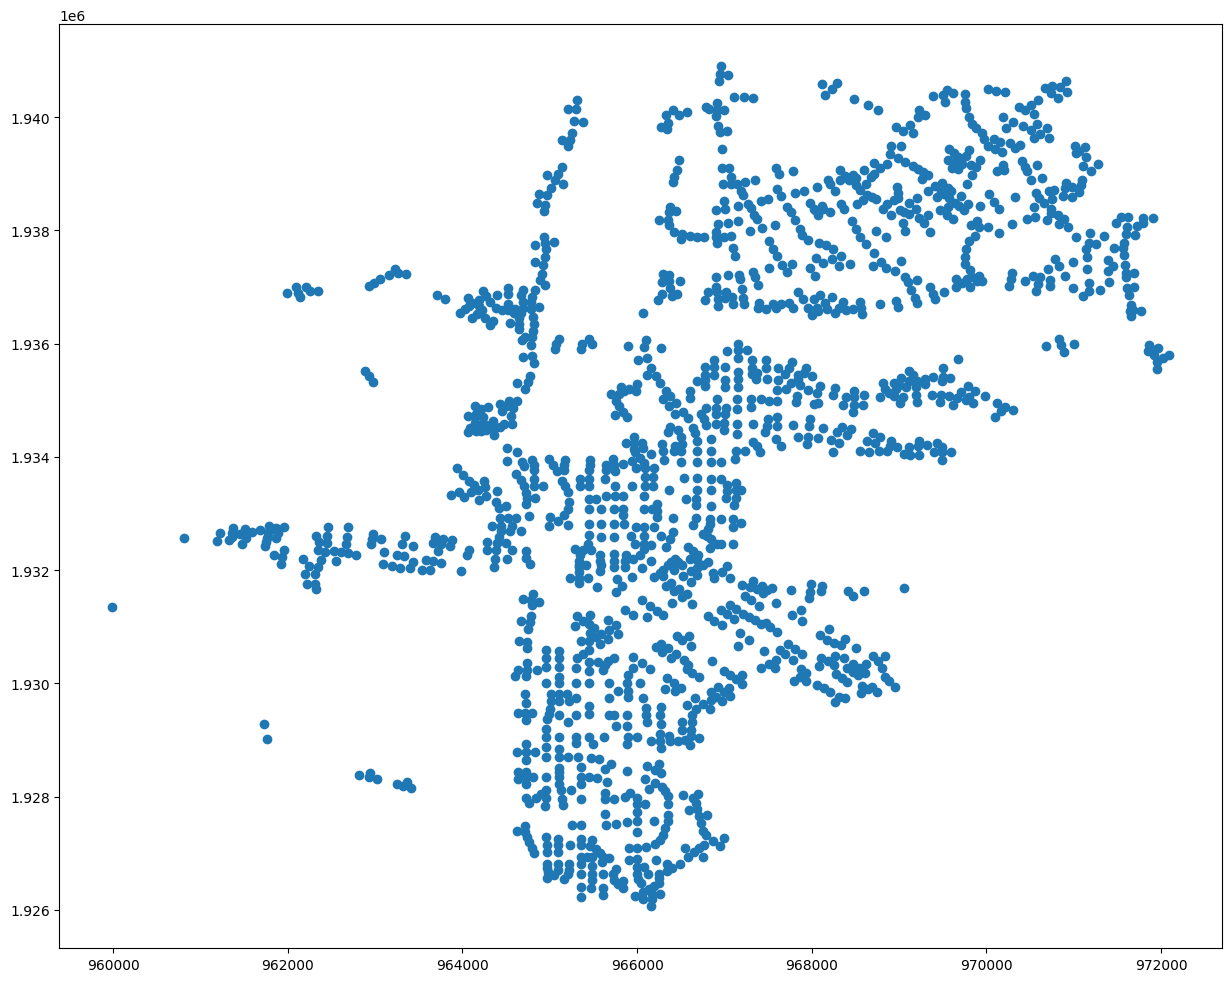

In [8]:
import matplotlib.pyplot as plt
import numpy as np
map_xs = []
map_ys = []
for datum in data:
    map_xs.append(int(datum['map_x']))
    map_ys.append(int(datum['map_y']))
plt.figure(figsize=(15, 12))
plt.scatter(map_xs, map_ys)
plt.show()

In [9]:
data[0]

{'node_id': 1,
 'int_name': '도촌4거리',
 'map_x': '968483',
 'map_y': '1935050',
 'LINK': [{'link_id': 6, 'start_node_id': 2, 'end_node_id': 1},
  {'link_id': 12, 'start_node_id': 755, 'end_node_id': 1},
  {'link_id': 4, 'start_node_id': 756, 'end_node_id': 1},
  {'link_id': 1, 'start_node_id': 757, 'end_node_id': 1},
  {'link_id': 5, 'start_node_id': 1, 'end_node_id': 2},
  {'link_id': 11, 'start_node_id': 1, 'end_node_id': 755},
  {'link_id': 3, 'start_node_id': 1, 'end_node_id': 756},
  {'link_id': 2, 'start_node_id': 1, 'end_node_id': 757}]}

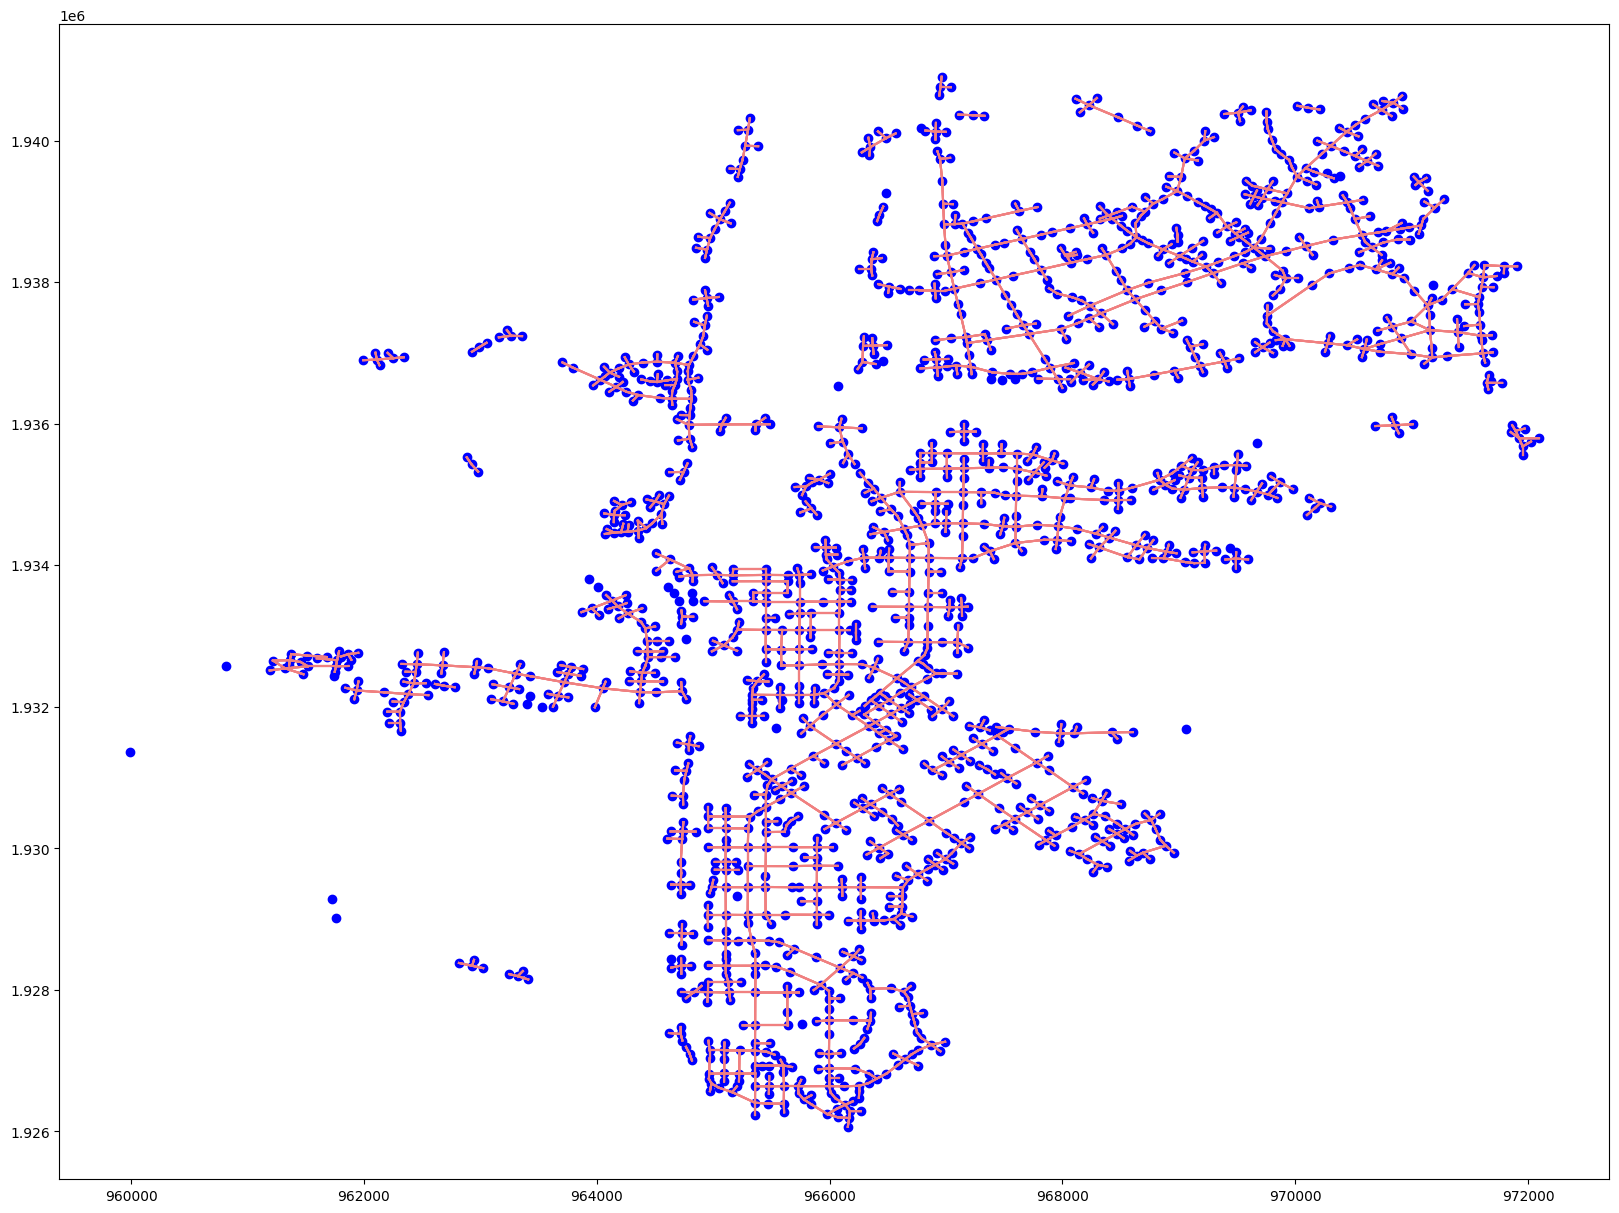

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(20, 15))
for datum in data:
    map_x = int(datum['map_x'])
    map_y = int(datum['map_y'])
    plt.scatter(map_x, map_y, color='b')
    LINK = datum['LINK']
    for link in LINK:
        start_node_id = link['start_node_id']
        end_node_id   = link['end_node_id']
        start_datum   = data[start_node_id-1]
        end_datum     = data[end_node_id-1]

        start_x = int(start_datum['map_x'])
        start_y = int(start_datum['map_y'])
        end_x   = int(end_datum['map_x'])
        end_y   = int(end_datum['map_y'])

        plt.plot([start_x, end_x], [start_y, end_y], color='lightcoral')
plt.show()
plt.savefig('intersections_and_links.png')

In [11]:
start_node_ids = []
end_node_ids = []
for datum in data:
    LINK = datum['LINK']
    for link in LINK:
        start_node_ids.append(link['start_node_id'])
        end_node_ids.append(link['end_node_id'])
start_node_ids = sorted(set(start_node_ids))
end_node_ids = sorted(set(end_node_ids))

In [12]:
print(set(start_node_ids).issubset(set(node_ids)))
print(set(node_ids).issubset(set(start_node_ids)))
print(set(end_node_ids).issubset(set(node_ids)))
print(set(node_ids).issubset(set(end_node_ids)))
print(start_node_ids == end_node_ids)
print(set(node_ids) - set(start_node_ids))

True
False
True
False
True
{384, 391, 10, 396, 908, 398, 400, 401, 402, 530, 547, 420, 421, 548, 549, 296, 424, 425, 432, 433, 434, 564, 953, 318, 574, 709, 710, 584, 714, 717, 337, 338, 213, 341, 244, 118}


In [13]:
len([datum for datum in data if datum['LINK']])

1610

In [14]:
len([datum for datum in data if not datum['LINK']])

36

In [15]:
len([datum for datum in data if datum['int_name']==''])

0

In [16]:
int_names = []
for datum in data:
    int_names.append(datum['int_name'])
int_names

['도촌4거리',
 '동원SK삼거리(아시아 주유소)',
 '상탑4거리',
 '돌마4거리(상탑3거리)',
 '상탑초3거리',
 '야탑3치안센터(상탑 P.B)',
 '테크노 단일로',
 '분당테크노파크A동',
 '분당테크노파크C동(분당테크노파크)',
 '야탑차량등록사업소',
 '야탑보듬이',
 '대원빌라4거리',
 '양촌어린이공원',
 '상탑초4거리',
 '중탑3거리',
 '중탑4거리',
 '야탑3동주민센터(야탑3동사무소)',
 '목련4거리',
 '목련3거리',
 '목련마을단일로',
 '성남세관3거리',
 '매화마을주공310동(매화마을주공3단지)',
 '매화마을4단지',
 '여수동입구4거리',
 '매화4거리',
 '분당성마르코성당(야탑성당)',
 '송림4거리(구송림고4거리)',
 '하탑3거리(하탑도서관)',
 '도레미유치원',
 '매화마을3거리',
 '야탑소방서',
 '야탑4거리',
 '장미4거리',
 '야탑역 단일로',
 '야탑역4거리',
 '하탑4거리(하탑지하차도)',
 '야탑중학교',
 '야탑시그마Ⅲ 3거리',
 '장미마을단일로',
 '돌마초교',
 '야탑 현대APT',
 '807의무경찰대(807전경대)',
 '터미널3거리',
 '터미널4거리',
 '분당차여성병원4거리(경찰서4거리)',
 '차병원3거리',
 '야탑지구대 사거리',
 '장미동부APT',
 '장미코오롱아파트(야탑초교)',
 '사송교4거리',
 '대우정비사업소',
 '재활용센터',
 '사송교3거리',
 '탄천운동장 동문(운동장서문)',
 '보건소3거리',
 '탄천운동장 남문',
 '탄천운동장4거리(탑4거리)',
 '야탑교4거리',
 '늘사랑어린이집(탑마을 단일로)',
 '하탑초교',
 '벌말4거리(보뜰4거리)',
 '탑대우APT입구(장미대우아파트입구)',
 '아름마을태영APT입구(탑대우APT)',
 '아름4거리',
 '탑골4거리',
 '아름건영아파트',
 '꾸러기유치원',
 '매송초교',
 '이매중3거리',
 '이매풍림5단지',
 '방아다리4거리',
 '물방아4거리',
 '이매소방서',
 '물방아

In [24]:
i=1
for int_name in int_names:
    print(i, int_name)
    i+=1

1 도촌4거리
2 동원SK삼거리(아시아 주유소)
3 상탑4거리
4 돌마4거리(상탑3거리)
5 상탑초3거리
6 야탑3치안센터(상탑 P.B)
7 테크노 단일로
8 분당테크노파크A동
9 분당테크노파크C동(분당테크노파크)
10 야탑차량등록사업소
11 야탑보듬이
12 대원빌라4거리
13 양촌어린이공원
14 상탑초4거리
15 중탑3거리
16 중탑4거리
17 야탑3동주민센터(야탑3동사무소)
18 목련4거리
19 목련3거리
20 목련마을단일로
21 성남세관3거리
22 매화마을주공310동(매화마을주공3단지)
23 매화마을4단지
24 여수동입구4거리
25 매화4거리
26 분당성마르코성당(야탑성당)
27 송림4거리(구송림고4거리)
28 하탑3거리(하탑도서관)
29 도레미유치원
30 매화마을3거리
31 야탑소방서
32 야탑4거리
33 장미4거리
34 야탑역 단일로
35 야탑역4거리
36 하탑4거리(하탑지하차도)
37 야탑중학교
38 야탑시그마Ⅲ 3거리
39 장미마을단일로
40 돌마초교
41 야탑 현대APT
42 807의무경찰대(807전경대)
43 터미널3거리
44 터미널4거리
45 분당차여성병원4거리(경찰서4거리)
46 차병원3거리
47 야탑지구대 사거리
48 장미동부APT
49 장미코오롱아파트(야탑초교)
50 사송교4거리
51 대우정비사업소
52 재활용센터
53 사송교3거리
54 탄천운동장 동문(운동장서문)
55 보건소3거리
56 탄천운동장 남문
57 탄천운동장4거리(탑4거리)
58 야탑교4거리
59 늘사랑어린이집(탑마을 단일로)
60 하탑초교
61 벌말4거리(보뜰4거리)
62 탑대우APT입구(장미대우아파트입구)
63 아름마을태영APT입구(탑대우APT)
64 아름4거리
65 탑골4거리
66 아름건영아파트
67 꾸러기유치원
68 매송초교
69 이매중3거리
70 이매풍림5단지
71 방아다리4거리
72 물방아4거리
73 이매소방서
74 물방아3거리
75 성남아트센터(문화예술회관)
76 매송중학교
77 이매초교
78 이매교4거리
79 안말4거리
80 이매성지아파트
81 이매역4거리(안말

In [17]:
int_nonames = [int_name for int_name in int_names if (int_name[:4]=='교차로_') & (7<=len(int_name)<=8)]

In [18]:
int_nonames

['교차로_755',
 '교차로_756',
 '교차로_757',
 '교차로_758',
 '교차로_759',
 '교차로_760',
 '교차로_761',
 '교차로_762',
 '교차로_763',
 '교차로_764',
 '교차로_765',
 '교차로_766',
 '교차로_767',
 '교차로_768',
 '교차로_769',
 '교차로_770',
 '교차로_771',
 '교차로_772',
 '교차로_773',
 '교차로_774',
 '교차로_775',
 '교차로_776',
 '교차로_777',
 '교차로_778',
 '교차로_779',
 '교차로_780',
 '교차로_781',
 '교차로_782',
 '교차로_783',
 '교차로_784',
 '교차로_785',
 '교차로_786',
 '교차로_787',
 '교차로_788',
 '교차로_789',
 '교차로_790',
 '교차로_791',
 '교차로_792',
 '교차로_793',
 '교차로_794',
 '교차로_795',
 '교차로_796',
 '교차로_797',
 '교차로_798',
 '교차로_799',
 '교차로_800',
 '교차로_801',
 '교차로_802',
 '교차로_803',
 '교차로_804',
 '교차로_805',
 '교차로_806',
 '교차로_807',
 '교차로_808',
 '교차로_809',
 '교차로_810',
 '교차로_811',
 '교차로_812',
 '교차로_813',
 '교차로_814',
 '교차로_815',
 '교차로_816',
 '교차로_817',
 '교차로_818',
 '교차로_819',
 '교차로_820',
 '교차로_821',
 '교차로_822',
 '교차로_823',
 '교차로_824',
 '교차로_825',
 '교차로_826',
 '교차로_827',
 '교차로_828',
 '교차로_829',
 '교차로_830',
 '교차로_831',
 '교차로_832',
 '교차로_833',
 '교차로_834',
 '교차로_835',
 '교차로_836',
 '교차로_837',
 '교차

In [19]:
print('전체 교차로 개수 :', len(int_names))
print('이름이 없는 교차로 개수 :', len(int_nonames))
print('이름이 있는 교차로 개수 :', len(int_names) - len(int_nonames))

전체 교차로 개수 : 1646
이름이 없는 교차로 개수 : 892
이름이 있는 교차로 개수 : 754


In [31]:
data_without_name = [datum for datum in data if datum['int_name'][:4]=='교차로_']
data_with_name = [datum for datum in data if datum['int_name'][:4]!='교차로_']

In [32]:
print(len(data))
print(len(data_without_name))
print(len(data_with_name))

1646
892
754


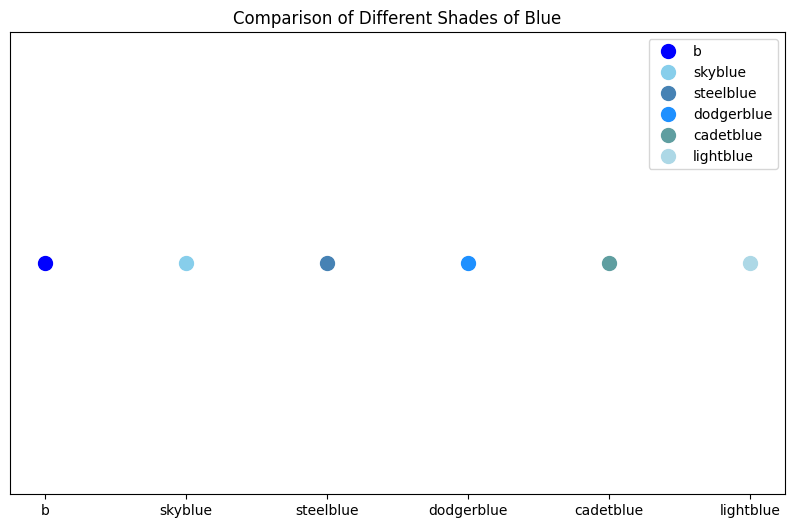

In [35]:
import matplotlib.pyplot as plt

# 정의된 색상 리스트
colors = ['b', 'skyblue', 'steelblue', 'dodgerblue', 'cadetblue', 'lightblue']

# 각 색상에 대해 점을 플롯
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors):
    plt.plot(i, 1, 'o', color=color, markersize=10, label=color)

plt.title('Comparison of Different Shades of Blue')
plt.xticks(range(len(colors)), colors)
plt.yticks([])  # Y축 눈금 제거
plt.legend()
plt.show()


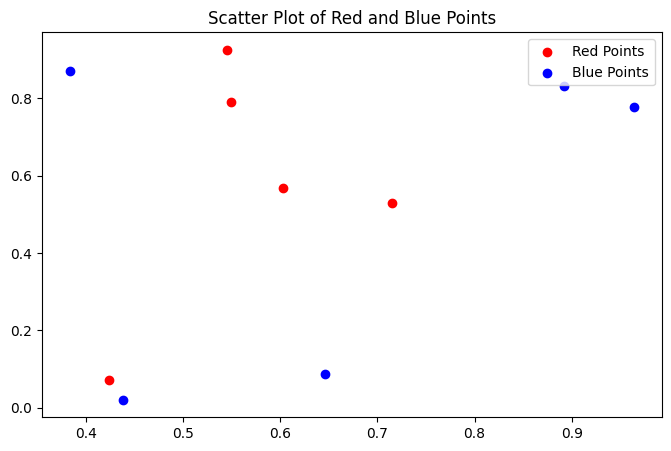

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Creating random data for 10 points
np.random.seed(0)  # For reproducibility
x = np.random.rand(10)
y = np.random.rand(10)

# Splitting the data into two groups for red and blue colors
x_red, y_red = x[:5], y[:5]
x_blue, y_blue = x[5:], y[5:]

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x_red, y_red, color='red', label='Red Points')
plt.scatter(x_blue, y_blue, color='blue', label='Blue Points')
plt.title('Scatter Plot of Red and Blue Points')
plt.legend()
plt.show()


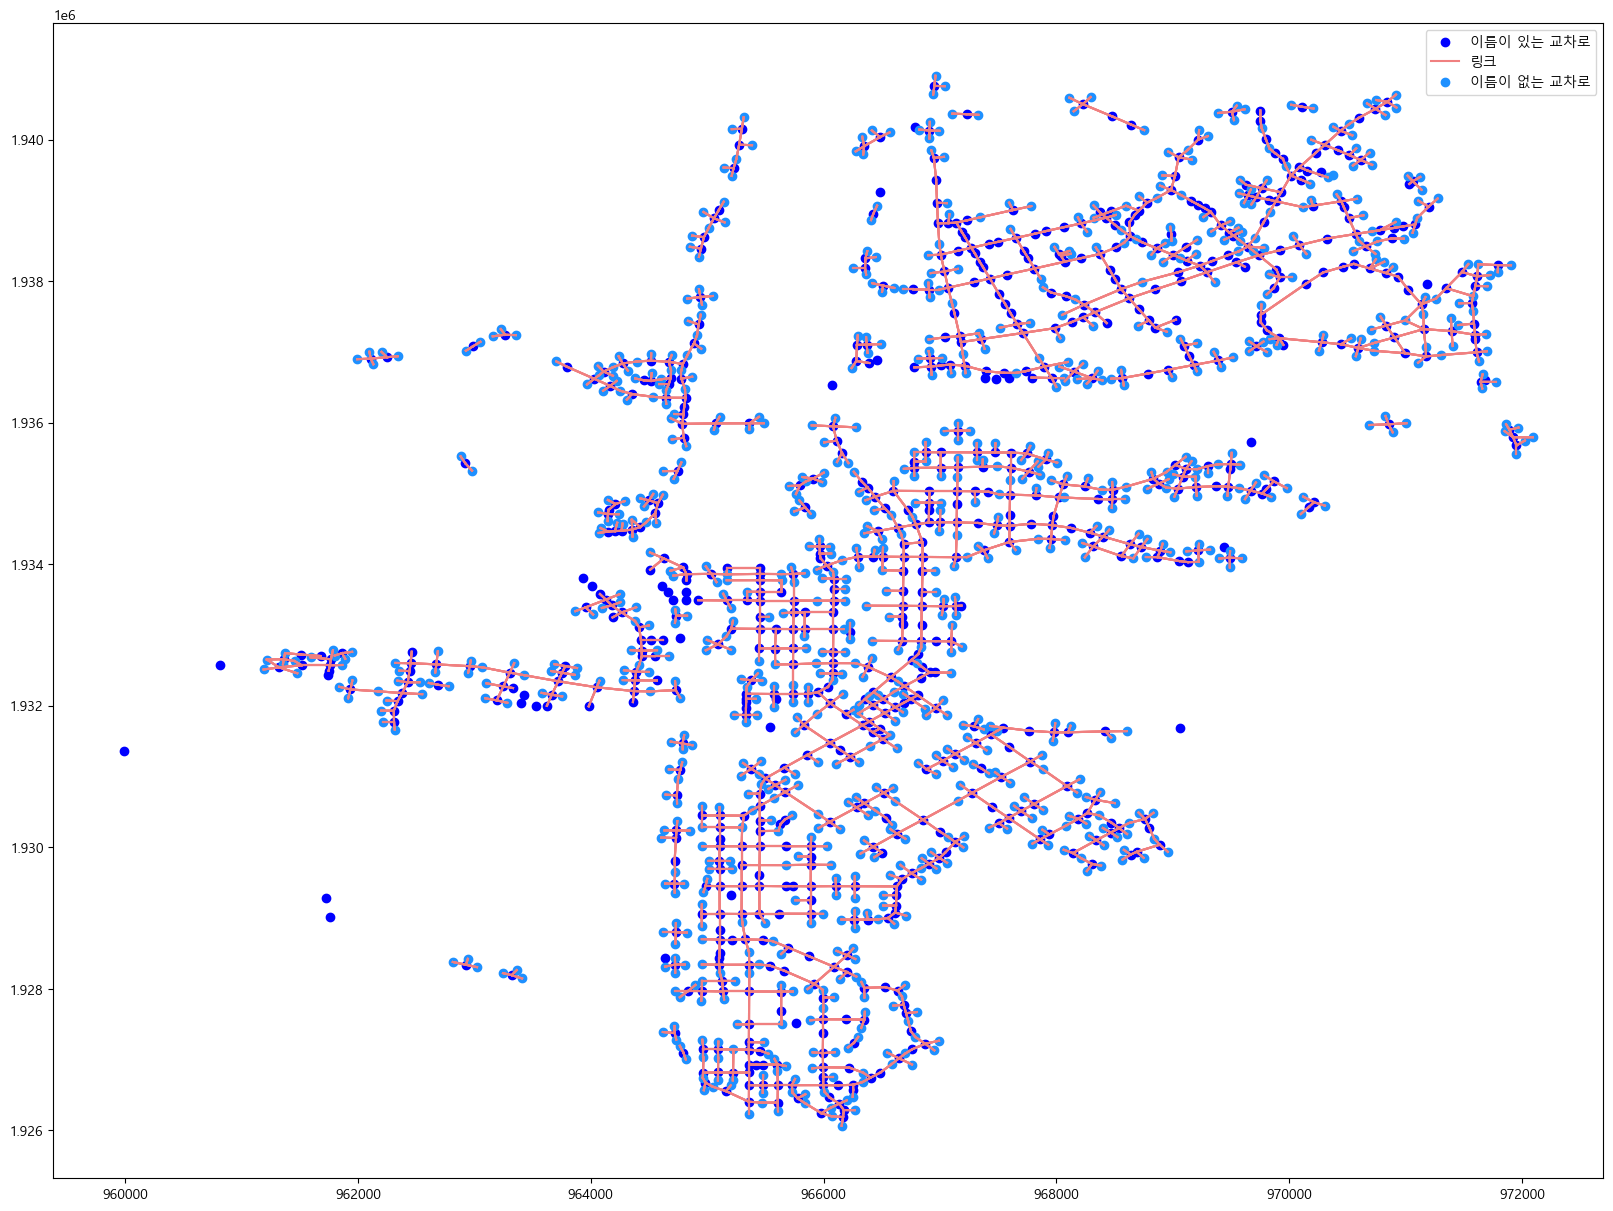

In [65]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20, 15))
legend_labels = {'b': "이름이 있는 교차로", 'dodgerblue': "이름이 없는 교차로", 'lightcoral': "링크"}

for datum in data:
    map_x = int(datum['map_x'])
    map_y = int(datum['map_y'])
    if datum in data_with_name:
        plt.scatter(map_x, map_y, color='b', label='이름이 있는 교차로')
    else:
        plt.scatter(map_x, map_y, color='dodgerblue', label='이름이 없는 교차로')
    LINK = datum['LINK']
    for link in LINK:
        start_node_id = link['start_node_id']
        end_node_id   = link['end_node_id']
        start_datum   = data[start_node_id-1]
        end_datum     = data[end_node_id-1]

        start_x = int(start_datum['map_x'])
        start_y = int(start_datum['map_y'])
        end_x   = int(end_datum['map_x'])
        end_y   = int(end_datum['map_y'])

        plt.plot([start_x, end_x], [start_y, end_y], color='lightcoral', label='링크')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig('intersections_and_links.png')
plt.show()

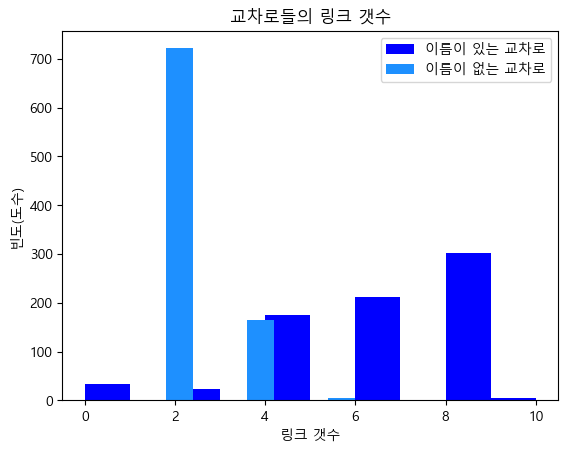

In [64]:
num_links_with_name = [len(datum['LINK']) for datum in data_with_name]
num_links_without_name = [len(datum['LINK']) for datum in data_without_name]
plt.hist(num_links_with_name, bins=10, color='b', label='이름이 있는 교차로')
plt.hist(num_links_without_name, bins=10, color='dodgerblue', label='이름이 없는 교차로')
plt.legend()
plt.title('교차로들의 링크 갯수')
plt.xlabel('링크 갯수')
plt.ylabel('빈도(도수)')
plt.savefig('histogram_num_links.png')
plt.show()